In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince  # Necesario para el análisis de correspondencias

# Cargar los datos
nombres_csv = {1,2,3,4,468,479,4003,4151,4160,4173}
pca_pesos={}

for nombre_csv in nombres_csv:
    data = pd.read_csv(f'Datos_procesados/{nombre_csv}.csv')
    data['Fecha'] = pd.to_datetime(data['Fecha'])  # Convertir 'Fecha' a formato datetime

    # Definir la fecha límite y filtrar el DataFrame
    fecha_limite = '2024-01-14'
    df_14days = data[data['Fecha'] <= fecha_limite].copy()

    # Normalizar los datos para PCA (sin 'Fecha' y 'Hora')
    scaler = StandardScaler()
    continue_data = df_14days[['period eating', 'period other', 'period resting', 'period rumination']]
    continue_data_scaled = scaler.fit_transform(continue_data)

    # Aplicar PCA para análisis de actividad
    pca = PCA(n_components=2)
    components = pca.fit_transform(continue_data_scaled)

    # Crear un DataFrame para los componentes principales
    loadings = pca.components_.T
    loadings_continue_data = pd.DataFrame(data=loadings, index=continue_data.columns, columns=['Principal Component 1', 'Principal Component 2'])

    # Calcular los pesos y el nivel de actividad basado en PCA
    pca_weights = (loadings_continue_data['Principal Component 1'] + loadings_continue_data['Principal Component 2']) / 2
    pca_pesos[nombre_csv]=pca_weights
    activity_level = continue_data.dot(pca_weights)
    # Añadir el nivel de actividad basado en PCA al DataFrame filtrado
    df_14days['nivel_actividad'] = activity_level

    # Calcular y añadir el nivel de actividad (PCA) al DataFrame original `data`
    data_continue = data[['period eating', 'period other', 'period resting', 'period rumination']]
    data['nivel_actividad'] = data_continue.dot(pca_weights)


    data.to_csv(f'Datos_actividad/{nombre_csv}_act.csv', index=False)


In [2]:
df_14days

,Fecha,Hora,period eating,period other,period resting,period rumination,period eating_count,period other_count,period resting_count,period rumination_count,nivel_actividad
0,2024-01-01,0,0.433,0.0,0.567,0.000,2.0,0.0,2.0,0.0,0.207136
1,2024-01-01,1,0.000,0.0,0.495,0.505,0.0,0.0,1.0,1.0,-0.240132
2,2024-01-01,2,0.000,0.0,0.944,0.056,0.0,0.0,1.0,2.0,0.081453
3,2024-01-01,3,0.000,0.0,0.498,0.502,0.0,0.0,1.0,1.0,-0.237984
4,2024-01-01,4,0.000,0.0,0.567,0.433,0.0,0.0,2.0,1.0,-0.188564
...,...,...,...,...,...,...,...,...,...,...,...
331,2024-01-14,19,1.000,0.0,0.000,0.000,1.0,0.0,0.0,0.0,0.319194
332,2024-01-14,20,0.223,0.0,0.157,0.620,1.0,0.0,1.0,1.0,-0.278426
333,2024-01-14,21,0.000,0.0,0.597,0.403,0.0,0.0,1.0,1.0,-0.167077
334,2024-01-14,22,0.456,0.0,0.151,0.393,1.0,0.0,1.0,1.0,-0.069795


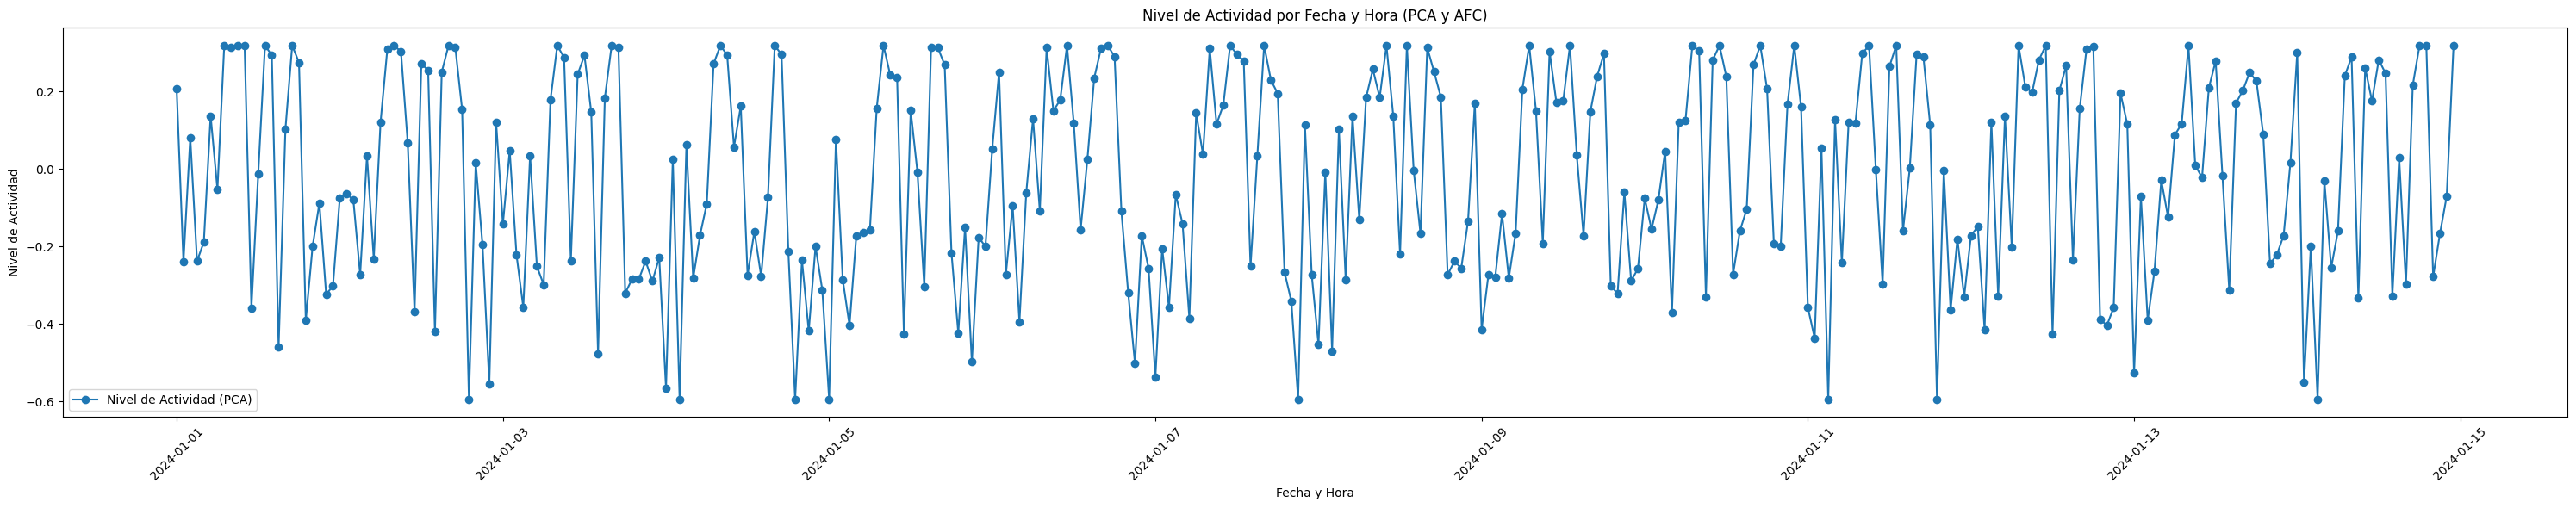

In [3]:
# Crear la columna datetime combinando 'Fecha' y 'Hora'
df_14days['FechaHora'] = df_14days.apply(lambda row: pd.Timestamp(row['Fecha']) + pd.Timedelta(hours=row['Hora']), axis=1)

# Asegurarse de que los datos estén ordenados por 'FechaHora'
df_14days.sort_values('FechaHora', inplace=True)

# Visualizar los resultados de PCA y AFC como gráficos de líneas
plt.figure(figsize=(30, 6))
plt.plot(df_14days['FechaHora'], df_14days['nivel_actividad'], marker='o', label='Nivel de Actividad (PCA)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Nivel de Actividad')
plt.title('Nivel de Actividad por Fecha y Hora (PCA y AFC)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
pca_pesos

{4160: period eating        0.072168
 period other         0.564514
 period resting      -0.206556
 period rumination   -0.365309
 dtype: float64,
 1: period eating        0.261201
 period other         0.536791
 period resting      -0.263668
 period rumination   -0.272229
 dtype: float64,
 2: period eating        0.322987
 period other         0.220680
 period resting      -0.577493
 period rumination    0.116110
 dtype: float64,
 3: period eating        0.254034
 period other         0.253133
 period resting      -0.594527
 period rumination    0.133896
 dtype: float64,
 4: period eating        0.065421
 period other         0.567442
 period resting      -0.269643
 period rumination   -0.317840
 dtype: float64,
 4003: period eating        0.299656
 period other         0.406887
 period resting       0.042130
 period rumination   -0.492823
 dtype: float64,
 4173: period eating        0.287020
 period other         0.505897
 period resting      -0.108868
 period rumination   -0.387086
